# Time series forecasting using fbrophet.

We are doing time series forecasting using fbprophet library. It is open source library provided by Facebook to do time series forecasting.

In [3]:
# Mount thee google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data Loading and cleaning.

In [5]:
# loading the data.
data2 = pd.read_csv('/content/drive/MyDrive/E-commerce_FBprophet/Final.csv')
data2.head()

,Unnamed: 0,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_y,seller_city,seller_state,geolocation_lat_y,geolocation_lng_y
0,200,3b697a20d9e427646d92567910af6d57,1,boleto,1,45.46,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,...,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,85801,cascavel,PR,-24.961401,-53.458166
1,33797,be5bc2f0da14d8071e2d45451ad119d9,1,boleto,1,39.09,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,...,1,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,15802,catanduva,SP,-21.142131,-48.989022
2,2464,a41c8759fbe7aab36ea07e038b2d4465,1,boleto,1,53.73,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-03 21:13:36,2016-10-05 03:11:49,...,1,45d33f715e24d15a6ccf5c17b3a23e3c,2016-10-21 16:18:26,36.49,17.24,18015,sorocaba,SP,-23.496367,-47.438900
3,49415,d207cc272675637bfed0062edffd0818,1,credit_card,6,133.46,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,...,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:23:06,119.90,13.56,14940,ibitinga,SP,-21.766477,-48.831547
4,55468,cd3b8574c82b42fc8129f6d502690c3e,1,credit_card,4,40.95,7812fcebfc5e8065d31e1bb5f0017dae,delivered,2016-10-03 22:31:31,2016-10-04 10:19:23,...,1,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96,13481,limeira,SP,-22.599254,-47.379810


In [6]:
# drop the 1st column unnamed.
data2.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# data description to see mean, median and min, max values
data2.describe()

,payment_sequential,payment_installments,payment_value,review_score,zip_code_prefix_x,geolocation_lat_x,geolocation_lng_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value,zip_code_prefix_y,geolocation_lat_y,geolocation_lng_y
count,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000
mean,1.091103,2.941733,171.631009,4.082235,35007.947485,-21.246926,-46.206888,48.792327,784.765430,2.201823,2104.711432,30.270752,16.619140,23.090259,1.195281,119.899501,19.994608,24531.355019,-22.796399,-47.250043
std,0.688199,2.778157,264.593676,1.346108,29855.320535,5.562717,4.046715,10.019078,650.950416,1.713650,3759.756946,16.137118,13.447286,11.709448,0.688399,181.318555,15.724430,27656.998348,2.703300,2.346276
min,1.000000,0.000000,0.000000,1.000000,1003.000000,-36.605374,-72.666706,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000,1001.000000,-36.605374,-64.283946
25%,1.000000,1.000000,60.750000,4.000000,11090.000000,-23.591085,-48.110471,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.900000,13.070000,6429.000000,-23.612053,-48.831547
50%,1.000000,2.000000,107.900000,5.000000,24230.000000,-22.929912,-46.632467,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,74.900000,16.310000,13690.000000,-23.420739,-46.755211
75%,1.000000,4.000000,189.160000,5.000000,58400.000000,-20.202116,-43.659570,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,133.000000,21.180000,28035.000000,-21.766477,-46.518082
max,26.000000,24.000000,13664.080000,5.000000,99980.000000,42.184003,-8.577855,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,409.680000,99730.000000,-2.546079,-34.847856


In [8]:
# information of data and itd datatypes.
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112653 entries, 0 to 112652
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112653 non-null  object 
 1   payment_sequential             112653 non-null  int64  
 2   payment_type                   112653 non-null  object 
 3   payment_installments           112653 non-null  int64  
 4   payment_value                  112653 non-null  float64
 5   customer_id                    112653 non-null  object 
 6   order_status                   112653 non-null  object 
 7   order_purchase_timestamp       112653 non-null  object 
 8   order_approved_at              112653 non-null  object 
 9   order_delivered_carrier_date   112653 non-null  object 
 10  order_delivered_customer_date  112653 non-null  object 
 11  order_estimated_delivery_date  112653 non-null  object 
 12  review_id                     

In [9]:
# taking only payment id, value and its time stamp.
monthly_data = pd.DataFrame(data2[['order_purchase_timestamp','payment_value','order_id']])
monthly_data.head()

,order_purchase_timestamp,payment_value,order_id
0,2016-10-03 09:44:50,45.46,3b697a20d9e427646d92567910af6d57
1,2016-10-03 16:56:50,39.09,be5bc2f0da14d8071e2d45451ad119d9
2,2016-10-03 21:13:36,53.73,a41c8759fbe7aab36ea07e038b2d4465
3,2016-10-03 22:06:03,133.46,d207cc272675637bfed0062edffd0818
4,2016-10-03 22:31:31,40.95,cd3b8574c82b42fc8129f6d502690c3e


In [10]:
# convert time column into data time format.
monthly_data['order_purchase_timestamp'] = pd.to_datetime(monthly_data['order_purchase_timestamp'], format= '%Y/%m/%d')
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112653 entries, 0 to 112652
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  112653 non-null  datetime64[ns]
 1   payment_value             112653 non-null  float64       
 2   order_id                  112653 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ MB


In [11]:
## monthly_data['order_purchase_timestamp'] = [d.date() for d in monthly_data['order_purchase_timestamp']]
## monthly_data

In [12]:
# Setting time stamp as an index.
monthly_data = monthly_data.set_index(['order_purchase_timestamp'])
monthly_data

,payment_value,order_id
order_purchase_timestamp,,
2016-10-03 09:44:50,45.46,3b697a20d9e427646d92567910af6d57
2016-10-03 16:56:50,39.09,be5bc2f0da14d8071e2d45451ad119d9
2016-10-03 21:13:36,53.73,a41c8759fbe7aab36ea07e038b2d4465
2016-10-03 22:06:03,133.46,d207cc272675637bfed0062edffd0818
2016-10-03 22:31:31,40.95,cd3b8574c82b42fc8129f6d502690c3e
...,...,...
2018-08-29 14:18:23,510.96,0b223d92c27432930dfe407c6aea3041
2018-08-29 14:18:23,510.96,0b223d92c27432930dfe407c6aea3041
2018-08-29 14:18:28,61.29,168626408cb32af0ffaf76711caae1dc


                          payment_value
order_purchase_timestamp               
2016-10-31                     60748.48
2016-11-30                         0.00
2016-12-31                        19.62
2017-01-31                    172882.76
2017-02-28                    314200.34


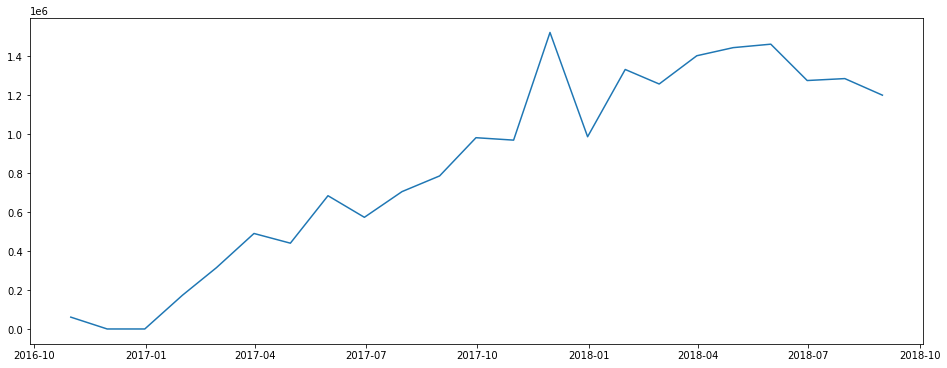

In [13]:
# Resampling and plotting data in monthly format.
resample = monthly_data.resample('M')
monthly_sales = resample.sum()
print(monthly_sales.head())
plt.figure(figsize=(16,6))
plt.plot(monthly_sales)
plt.show()

In [14]:
# resetting index.
monthly_sales = monthly_sales.reset_index()
monthly_sales

,order_purchase_timestamp,payment_value
0,2016-10-31,60748.48
1,2016-11-30,0.00
2,2016-12-31,19.62
3,2017-01-31,172882.76
4,2017-02-28,314200.34
5,2017-03-31,489953.98
6,2017-04-30,440157.70
7,2017-05-31,683657.94
8,2017-06-30,572901.69
9,2017-07-31,704638.37


In [15]:
# We are renaming columns as 'ds' and 'y' because in FB prophet only take those columns while predicting.
monthly_sales.columns = ['ds','y']
monthly_sales

,ds,y
0,2016-10-31,60748.48
1,2016-11-30,0.00
2,2016-12-31,19.62
3,2017-01-31,172882.76
4,2017-02-28,314200.34
5,2017-03-31,489953.98
6,2017-04-30,440157.70
7,2017-05-31,683657.94
8,2017-06-30,572901.69
9,2017-07-31,704638.37


# Model Building

In [23]:
# Installing FBprophet first to use it.
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638896 sha256=b37cfc02222da62875b325e4780031ad82d82acd8129384007faa355e4c47195
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [24]:
# Importing the model.
from fbprophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [25]:
# Initializing the model.
model = Prophet()
# fit the model.
model.fit(monthly_sales)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [26]:
# Creating future dates.
future_dates = model.make_future_dataframe(periods=90)

In [27]:
# predicting the future sales value.
predictions=model.predict(future_dates)

In [28]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-10-31,78355.952946,-153121.254210,315890.193509,78355.952946,78355.952946,0.0,0.0,0.0,0.0,0.0,0.0,78355.952946
1,2016-11-30,146839.156395,-102091.648330,375616.119569,146839.156395,146839.156395,0.0,0.0,0.0,0.0,0.0,0.0,146839.156395
2,2016-12-31,217605.133382,-30567.625816,454790.238204,217605.133382,217605.133382,0.0,0.0,0.0,0.0,0.0,0.0,217605.133382
3,2017-01-31,288371.110315,55805.128585,531366.279006,288371.110315,288371.110315,0.0,0.0,0.0,0.0,0.0,0.0,288371.110315
4,2017-02-28,352288.766973,111077.071811,581246.500059,352288.766973,352288.766973,0.0,0.0,0.0,0.0,0.0,0.0,352288.766973


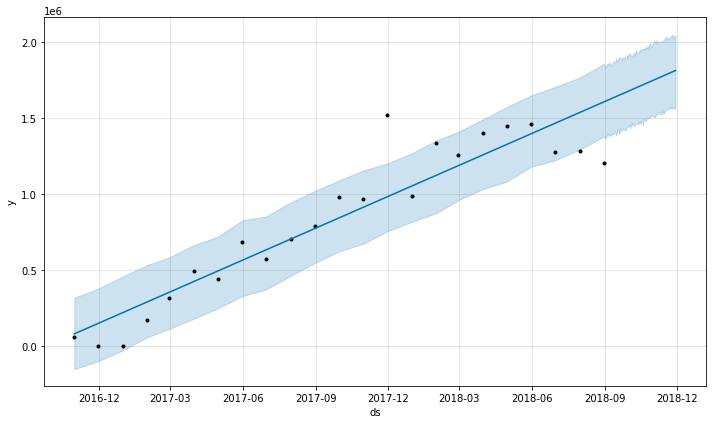

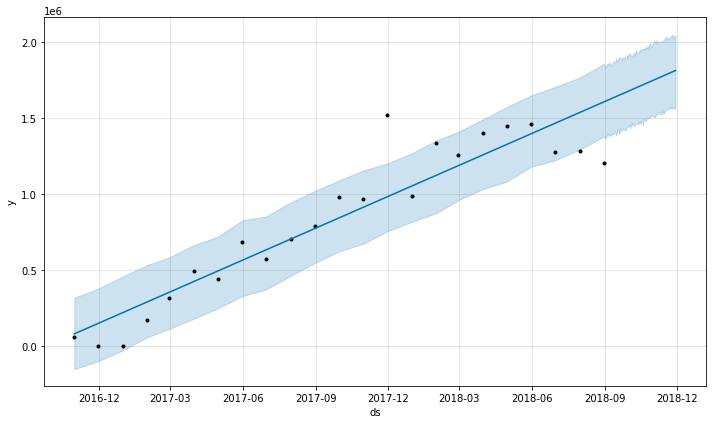

In [30]:
## For Prediction
model.plot(predictions)

We are getting a straight blue line is forecast and blue shade is upper and lower bound of the forecast.